In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
#main_path = './../../../Dropbox/McGill-publication/Papers/Multisite/'
main_path = '/home/cdansereau/git/Projects/multisite/'

In [145]:
import os
from os import path

#files = filter(path.isfile, os.listdir('/Users/christian/git/Projects/multisite/demographic_data/'))
files =  os.listdir('/Users/christian/git/Projects/multisite/demographic_data/')

In [195]:

all_demog = pd.DataFrame()


for i in range(len(files)):
    path_csv = 'demographic_data/' + files[i]
    if i==0:
        all_demog = pd.read_csv(path_csv, sep=None, index_col=0, names=['','age','sex'], usecols=[0,2,3])
    else:
        tmp_demog = pd.read_csv(path_csv, sep=None, index_col=0, names=['','age','sex'], usecols=[0,2,3])
        all_demog = all_demog.append(tmp_demog)
    #print all_demog.shape
    

In [197]:
path_csv = 'demographic_1000fcon.csv'
demograph = pd.read_csv(path_csv,index_col=0)


#subj_names = demograph[demograph.multisite == 1].values[:,0]



#df1['e'] = Series(np.random.randn(sLength), index=df1.index)
#print demograph.index.values

valid_list = demograph.index.values
#print demograph.index.values
for i in range(len(demograph.index)):
        valid_list[i] = valid_list[i].replace(' ','')
    
#print valid_list
#demograph
print len(valid_list)

# make sure that we remove duplicates
all_demog["index"] = all_demog.index
all_demog.drop_duplicates(subset='index', take_last=True, inplace=True)
del all_demog["index"]

all_demog = all_demog.loc[valid_list,:]

print 

demograph['age'] = Series(all_demog['age'].astype(int), index=all_demog.index)
demograph['sex'] = Series((all_demog['sex']=='m').astype(int), index=all_demog.index)
demograph.to_csv('demographic_1000fcon_consolidated.csv')


345



              FD    multisite         age         sex
count  345.000000  345.000000  345.000000  345.000000
mean     0.159929    3.776812   23.857971    0.417391
std      0.047433    1.881531    5.147827    0.493845
min      0.066739    1.000000   18.000000    0.000000
25%      0.123938    3.000000   20.000000    0.000000
50%      0.156115    3.000000   22.000000    0.000000
75%      0.188687    4.000000   26.000000    1.000000
max      0.313306    8.000000   46.000000    1.000000


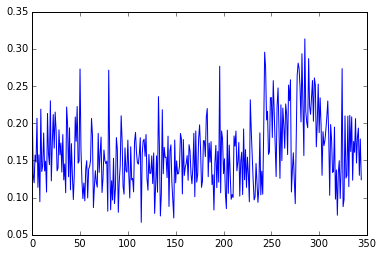

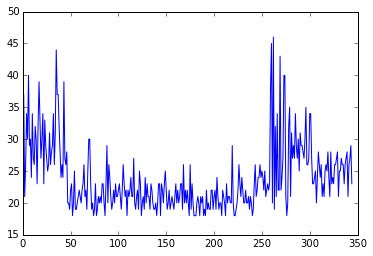

In [199]:
print demograph.describe()
plt.figure()
plt.plot(demograph['FD '])
plt.figure()
plt.plot(demograph['age'])
